# Workshop5. Линейная регрессия. (33 балла)

> Линейная регрессия - это не повод для затяжной депрессии.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [Первый конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture02-linregr.pdf)
- [Второй конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture03-linregr.pdf)
- [Теория из курса ODS](https://github.com/Yorko/mlcourse_open/blob/master/jupyter_notebooks/topic04_linear_models/topic4_linear_models_part1_mse_likelihood_bias_variance.ipynb)
- [Материалы из курса от МФТИ](https://www.coursera.org/specializations/machine-learning-data-analysis)
- [Статья про лин.рег. от ODS на habrahabr](https://habrahabr.ru/company/ods/blog/323890/)

## Данные

Возьмем датасет о стоимости домов: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

Целевой переменной будет `SalePrice`. То есть мы будем предсказывать стоимость жилья на основе его характеристик. Это задание будет не то чтобы про линейную регрессию, но про попытку построить модель для предсказания цен на дом. В принципе я бы мог еще добавить заданий на более тщательный отбор признаков, логарифмирование признаков, у которых сильное смещение "скоса"(skew). Можно было бы анализировать и выпрямлять распределение целевой переменной. Можно было бы генерировать новые признаки из существующих, строить ансамбли моделей. Но мы ограничимся, пока что.......

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!ls

df = pd.read_csv('data/house_prices.csv.gz', index_col='Id')
df.head()

adult.csv.gz
data
Homework_1.ipynb
titanic_train.csv
week04_homework_04-01-clustering-homework.ipynb
week04_workshop_04-01-clustering-workshop.ipynb
week05_workshop_05-01-clustering-workshop.ipynb
week06_workshop_06-01-linear-regression-homework.ipynb
week2_homework_02-01-homework-numpy.ipynb
week2_homework_02-02-homework-pandas.ipynb
week2_workshop_02-01-workshop-numpy.ipynb
week2_workshop_02-02-workshop-pandas.ipynb
week3_homework_03-01-visualisation-homework.ipynb
week3_workshop_03-01-visualisation-workshop.ipynb
Workshop_1.ipynb


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
assert df.shape == (1460, 80)

In [4]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## 1.0 Анализ целевого признака (3 балла)

Удостоверимся, что раcпределение целевого признака "хорошее", без странных выбросов. В идеале мы хотим видеть нормальное распределени или достаточно похожее на него, без очень длинных "хвостов" выбросов.

_Почему требуется нормальность распределения: ищите объяснения линейной регресси через алгоритмы максимизации правдоподобия. В итоге, грубо говоря, суть сводится к тому, что с ростом объема выборки, оценка максимального правдоподобия лучше описывает нормальное распределение._

[Коэффициент эксцесса](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0) показывает степень остроты пика распределения случайной величины. Для нормального распределения он равен `0`. Если хвосты распределения «тяжелее», а пик более «приплюснутый», чем у нормального распределения, то коэффициент < 0. А если хвосты легкие, то больше 0. В нашем случае должно получиться околов `6.5`.

Задание: 
- Нарисуйте график распределения `SalePrice`, используйте аргумент `fit=scipy.stats.norm`, чтобы нарисовать предполагаемое нормальное распределение. Напечатайте значение коэффициент эксцесса `kurtosis` для этого признака.
- Нарисуйте график [scipy.stats.probplot](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html) - он покажет нам реальные квантили выборки и теоретические. По нему можно видеть, на сколько много выьросов и на сколько выборка предсказуема.
- Что вы можете сказать по поводу выборки основываясь на `probplot`.  [wiki](https://en.wikipedia.org/wiki/Normal_probability_plot)

/home/evggenshch/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


6.509812011089439

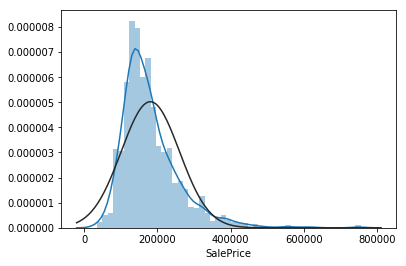

In [5]:
import scipy as scp

sns.distplot(df['SalePrice'], fit=scp.stats.norm)
scp.stats.kurtosis(df['SalePrice'])

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519414, 180921.19589041095, 0.9319665641512983))

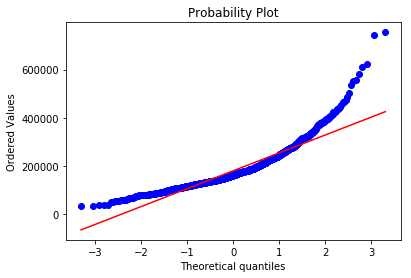

In [6]:
scp.stats.probplot(df['SalePrice'], plot=plt)

__*Выборка целевого признака с хорошей степенью точности удовлетворяет нормальному распределению*__

## 1.2 Анализ некоторых зависимостей (3 балла)

У нас очень много разных признаков. Любопытно построить разные графики. Позаботьтесь о красоте и наглядности графиков, сделайте так, чтобы они были большими и их можно было прочесть. Даже подписи на графиках должны быть читаемые!!

Задания: Постройте графики, отражающие зависимости этих признаков:
- дата постройки дома и его стоимости
- "качество дома и материалов" и его стоимости
- площадь дома и стоимость

Hints: Вспомните про boxplot, jointplot, lmplot...

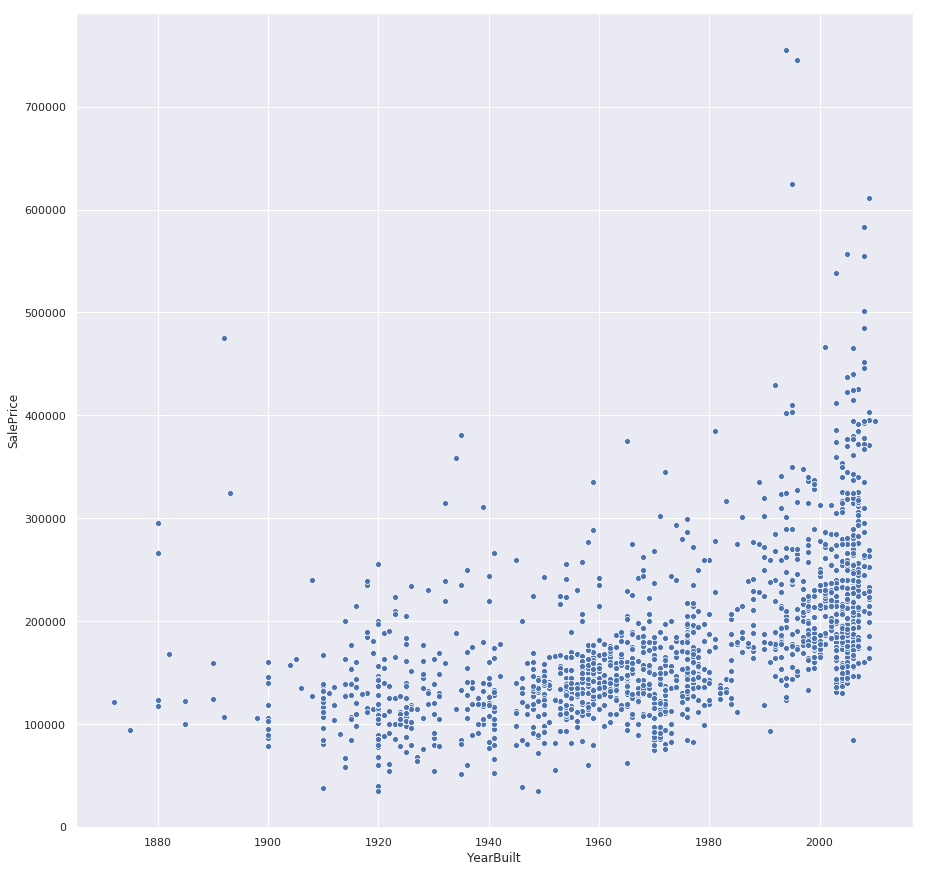

In [136]:
plt.figure(figsize=(15, 15))
sns.scatterplot(df['YearBuilt'], df['SalePrice'])

<Figure size 1080x1080 with 0 Axes>

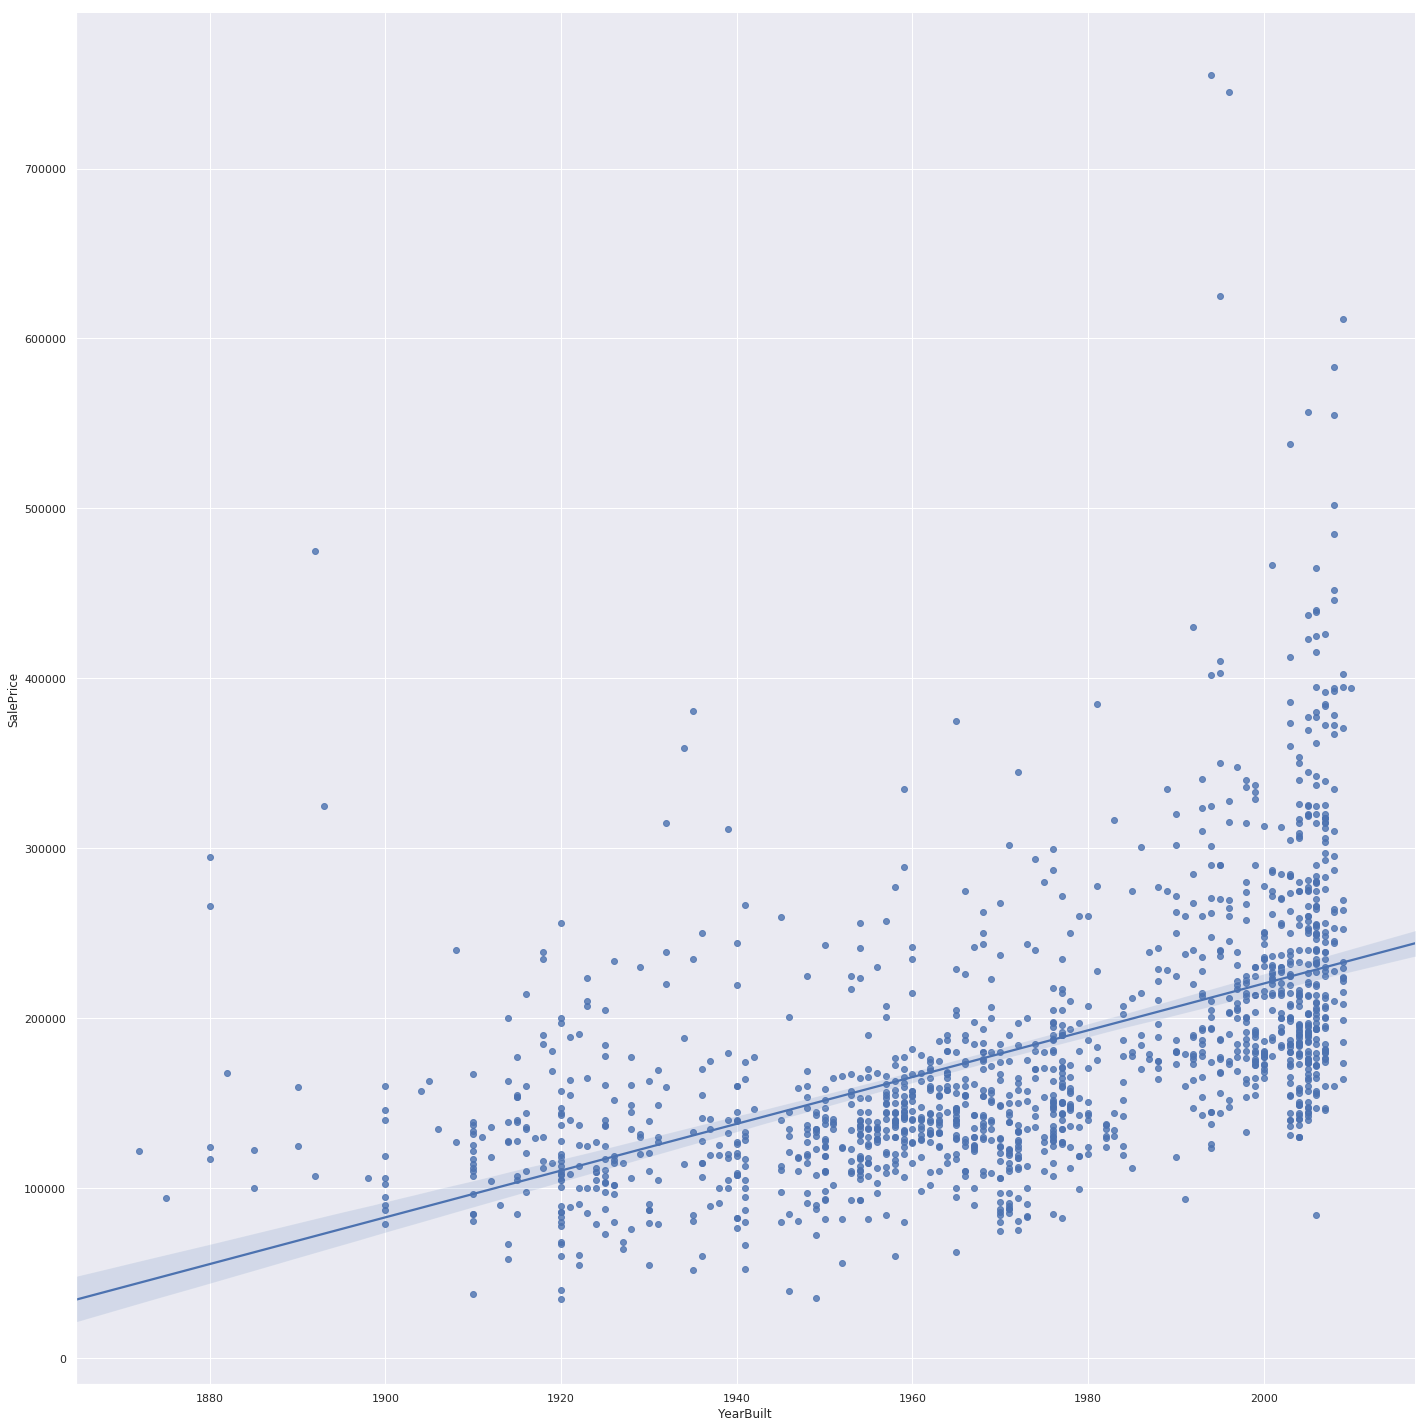

In [152]:
sns.lmplot(x='YearBuilt', y='SalePrice', data=df, height = 20)

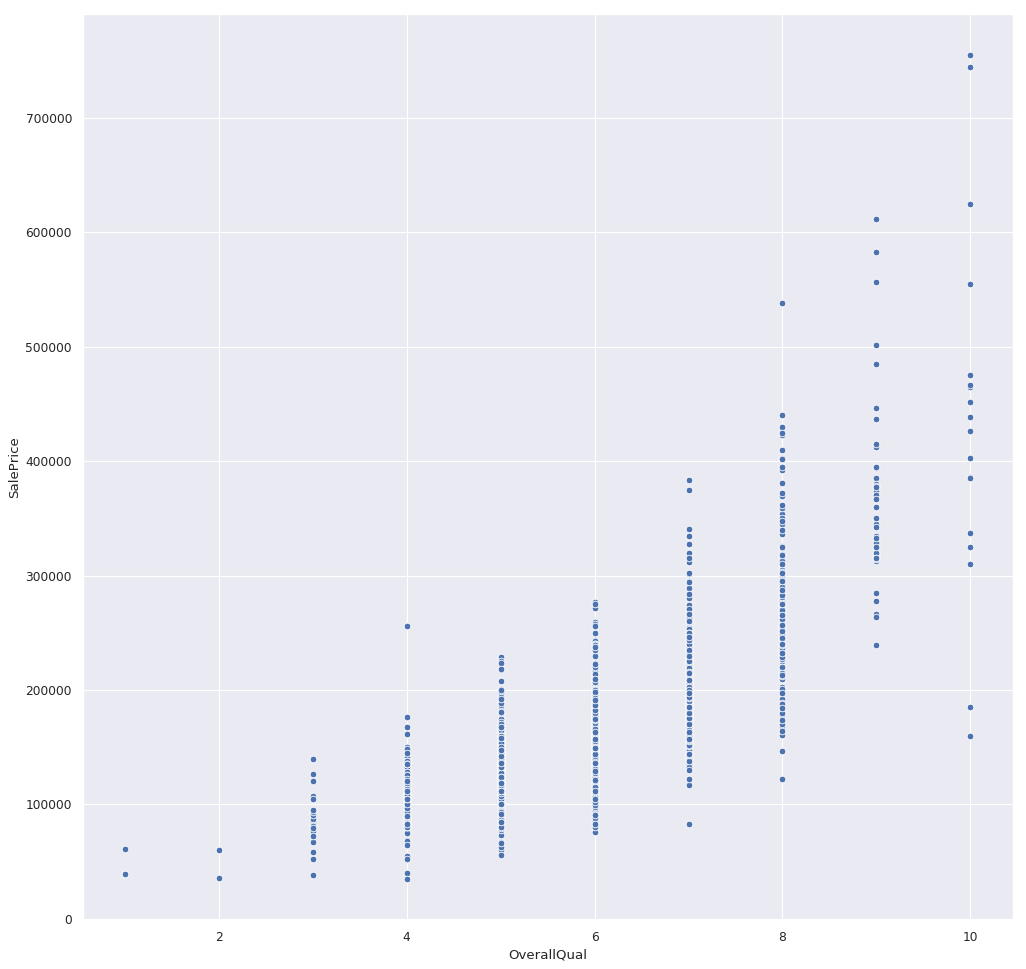

In [137]:
plt.figure(figsize=(15, 15), dpi=80)
sns.scatterplot(df['OverallQual'], df['SalePrice'])

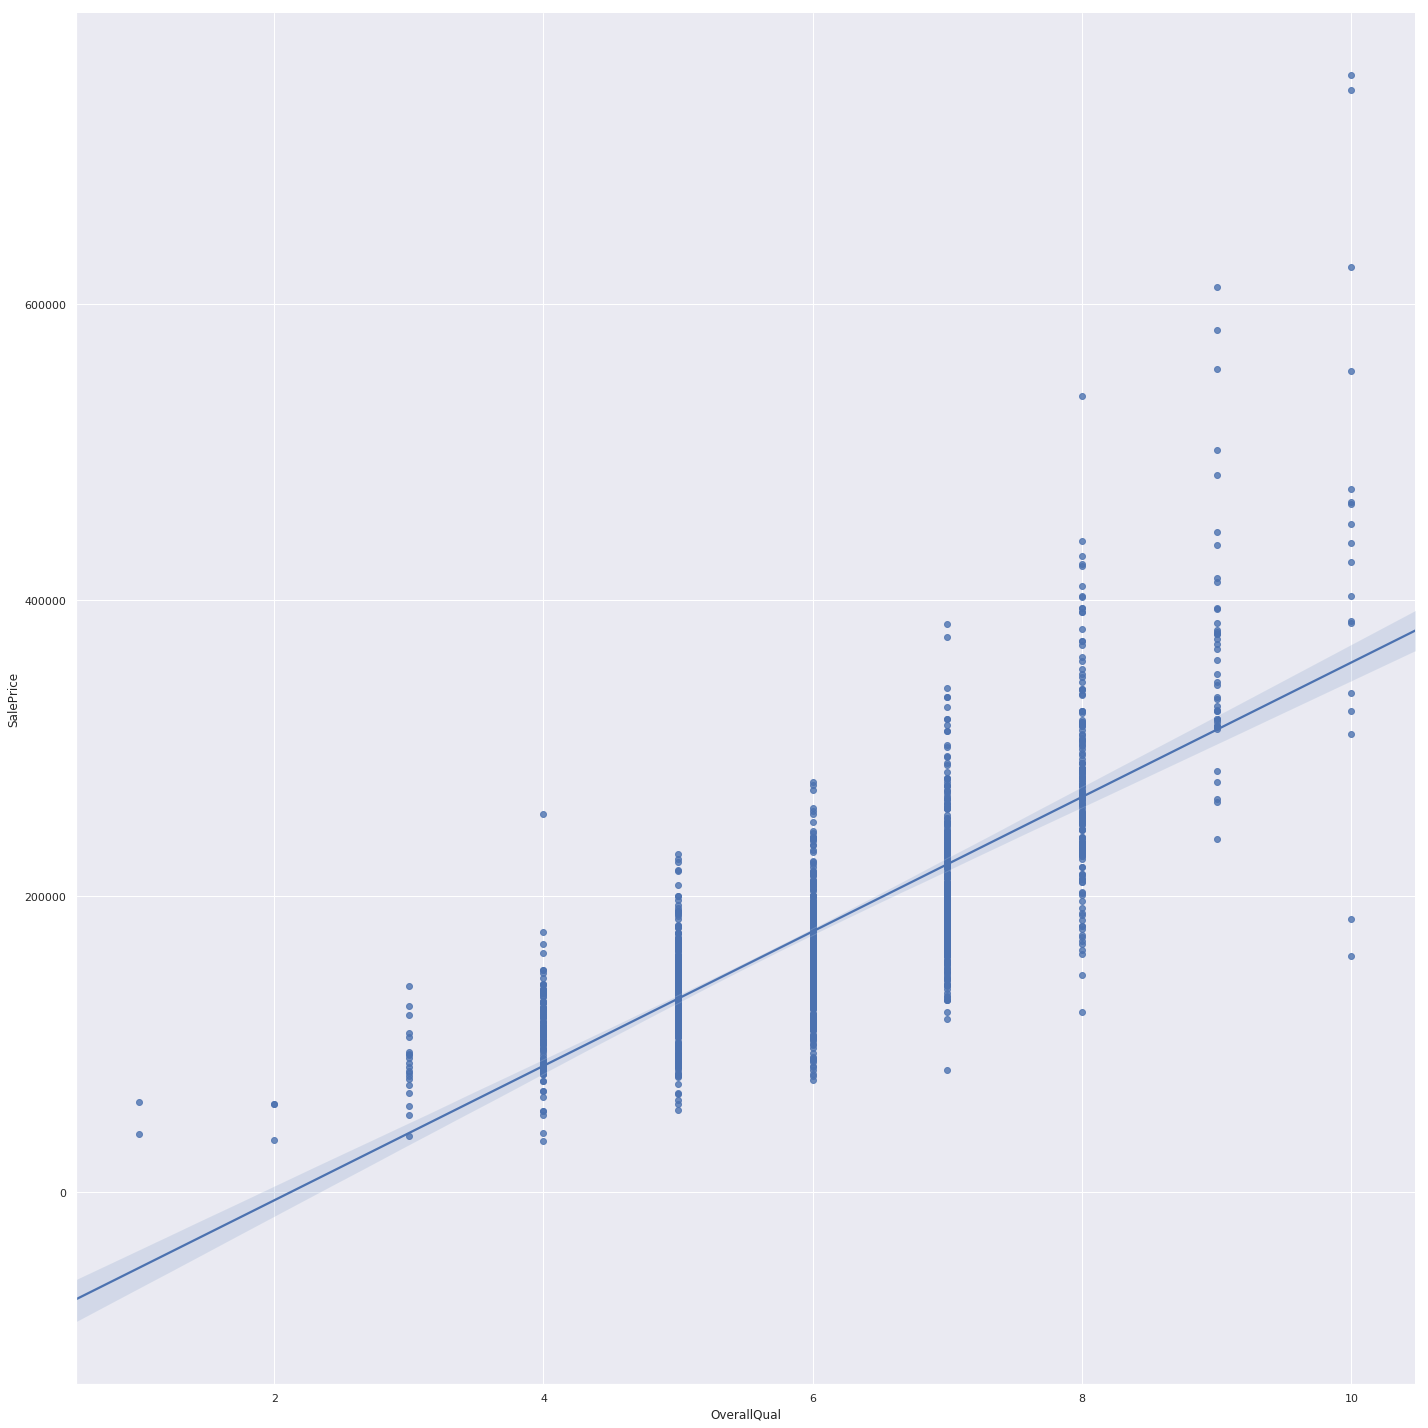

In [153]:
sns.lmplot(x='OverallQual', y='SalePrice', data=df, height = 20)

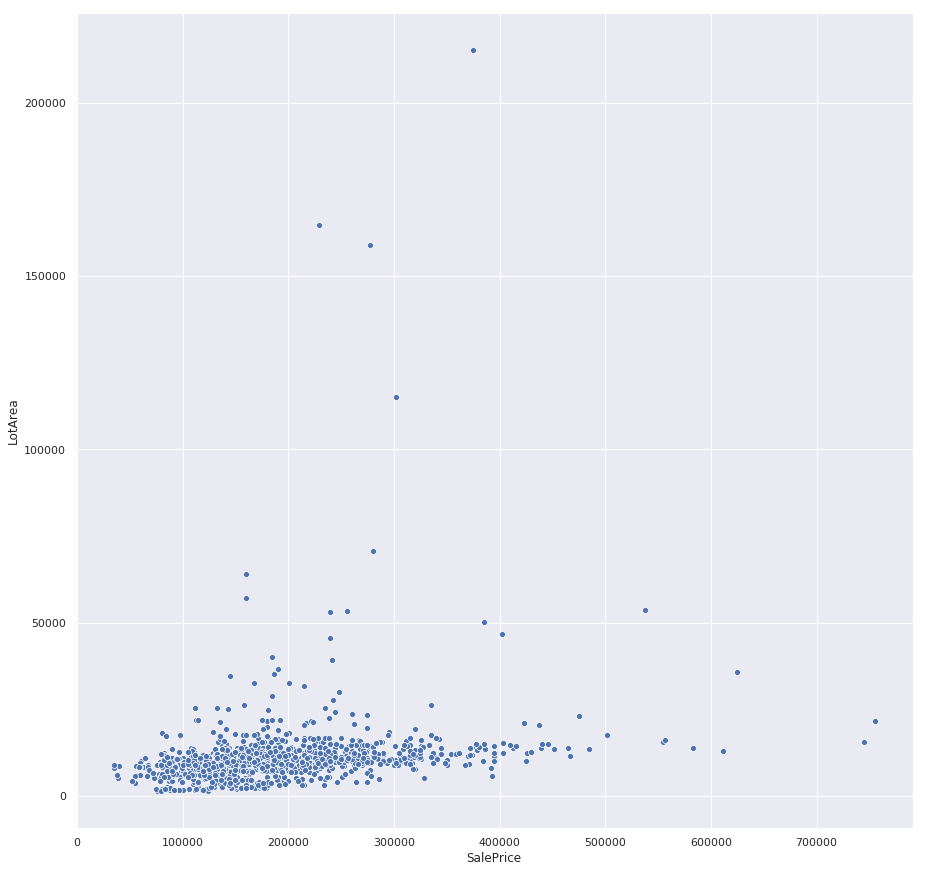

In [157]:
plt.figure(figsize=(15, 15))
sns.scatterplot(df['SalePrice'], df['LotArea'])

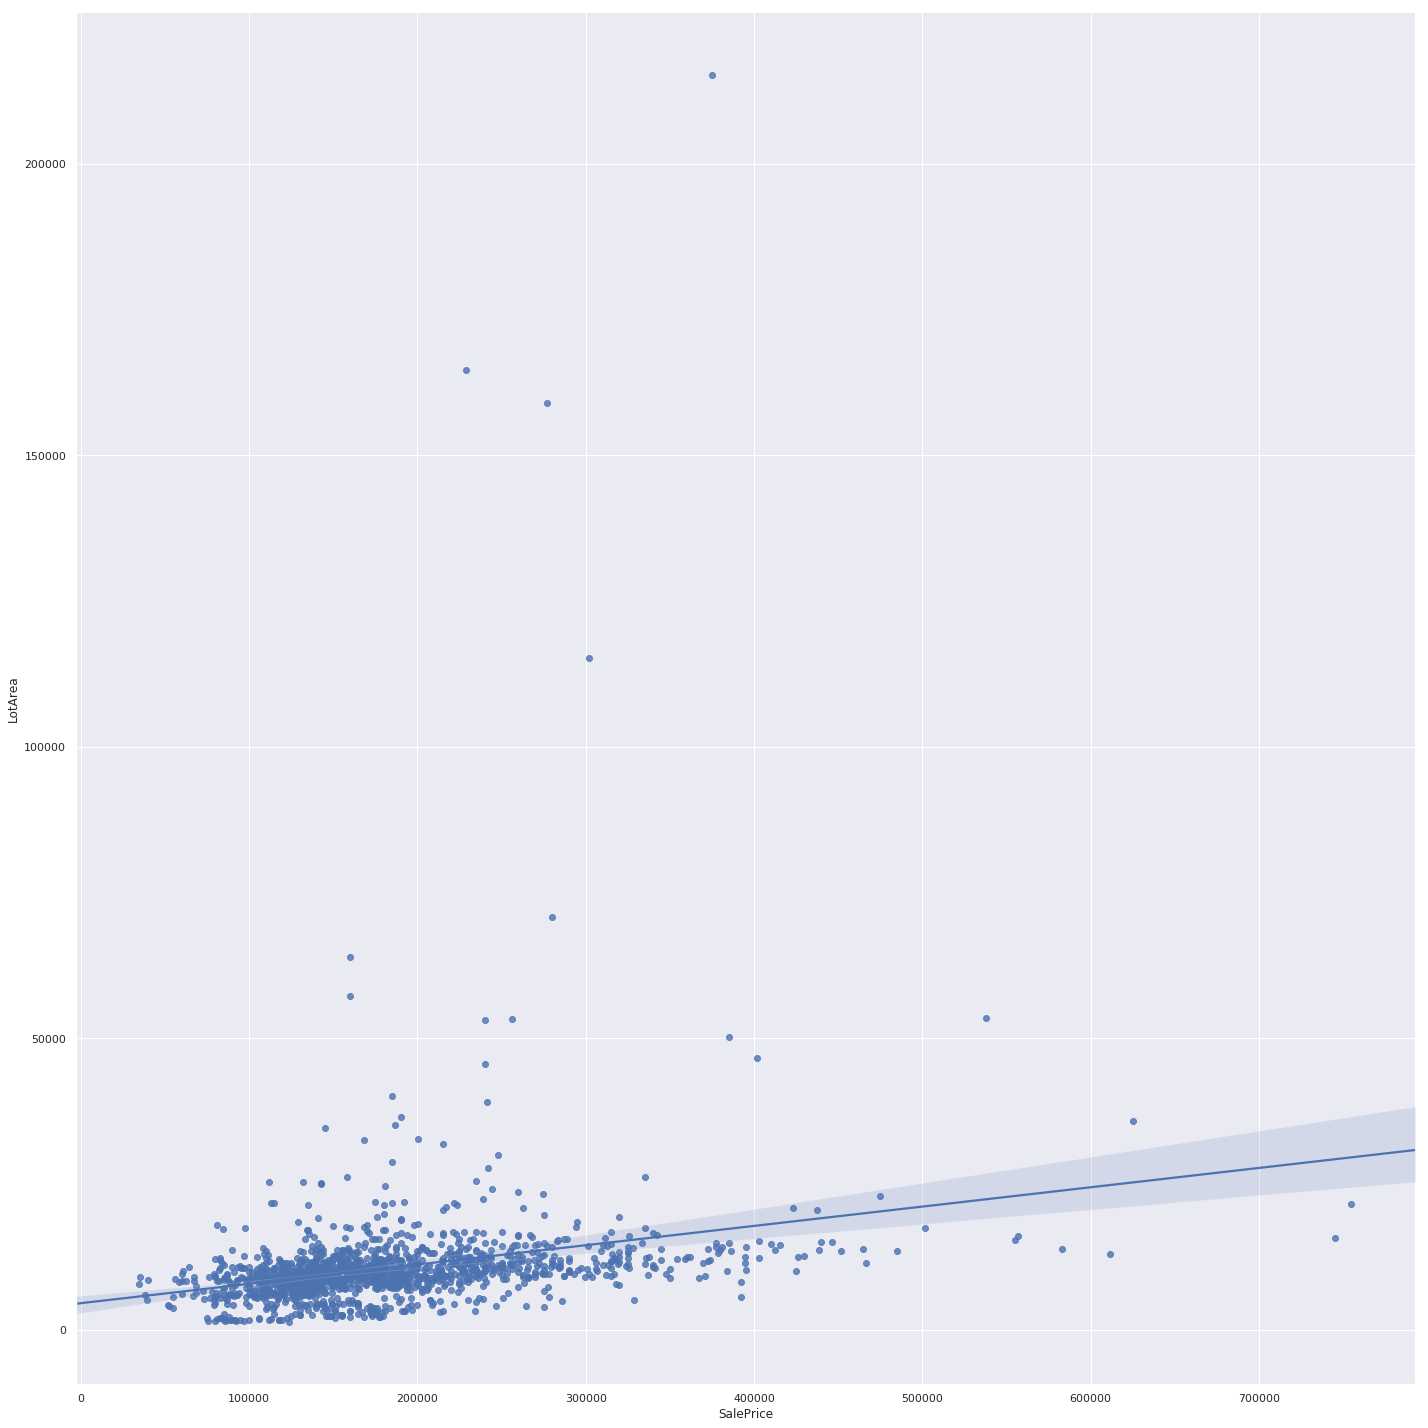

In [156]:
sns.lmplot(x='SalePrice', y='LotArea', data=df, height = 20)

## 1.2 Heatmap (3 балла)

Судя по предыдущим графикам, есть некоторые линейные зависимости. Но строить по графику на каждый признак из 80 штук немного долго и не наглядно. Постройте красивый график корреляции всех признаков. Используйте цвета `RdYlGn`, так будет нагляднее. Не забудьте применить маску, чтобы убрать дублирующую половину матрицы.

(37, 37)

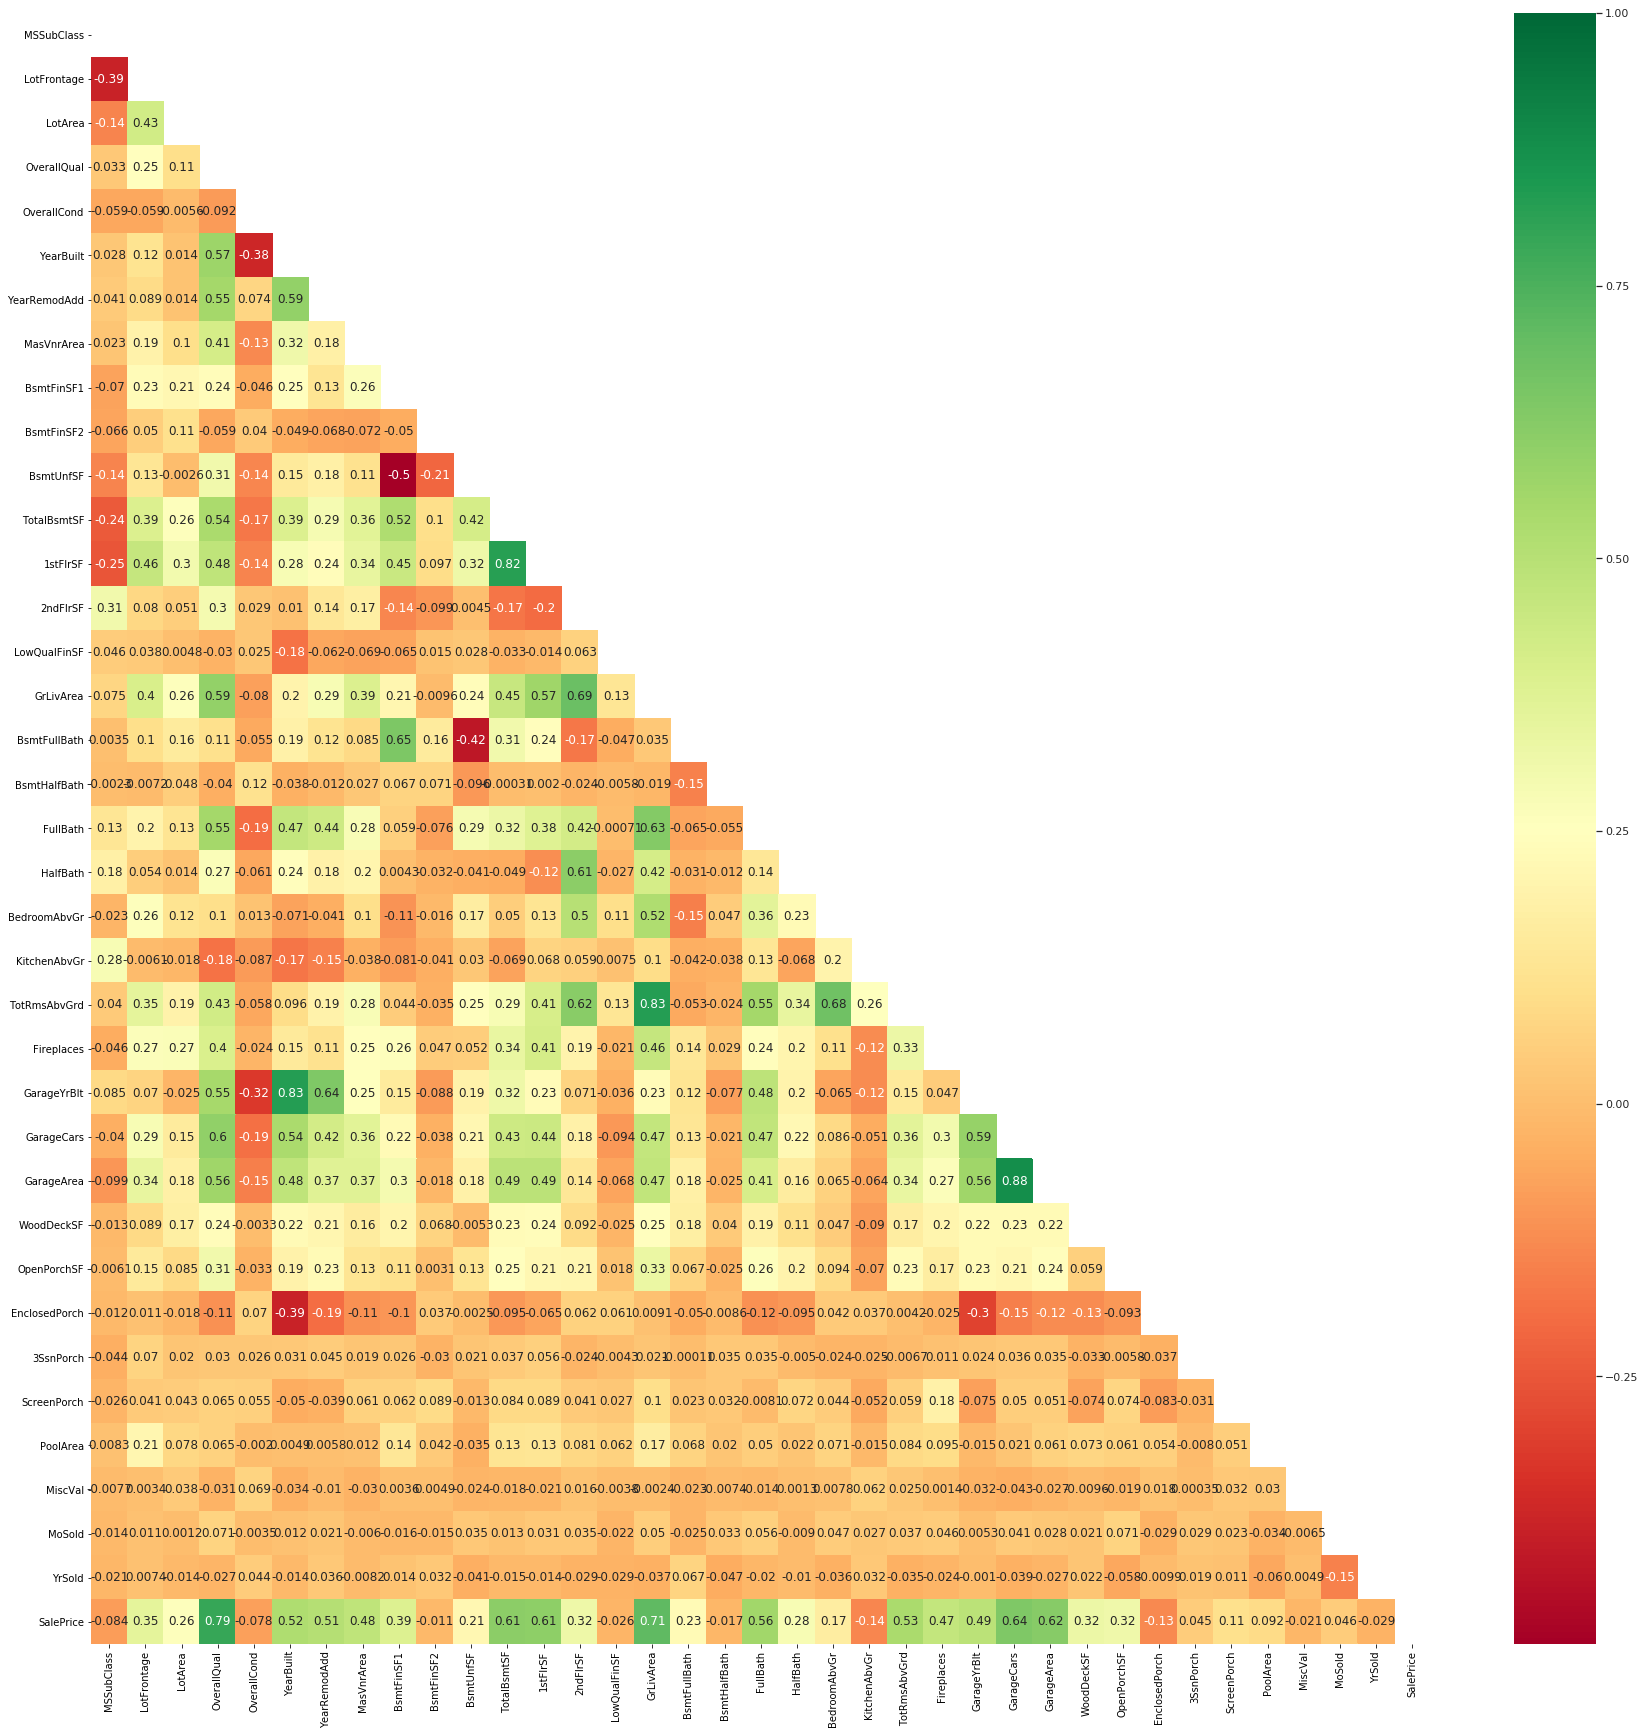

In [10]:
df2 = df.select_dtypes(exclude='object')
fig, ax = plt.subplots(figsize=(30,30))
sns.set(font_scale=1.0)
mask = np.zeros_like(df2.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df2.corr(), annot=True, ax=ax, mask=mask, cmap=plt.get_cmap('RdYlGn'))

df2.corr().shape

Большая матрица 38x38 ячеек. И мы видим, там есть сильно коррелируемые объекты с нашей целевой переменной. 

- Нарисуйте крупно heatmap этих сильно коррелируемых объектов( больше 0.5 по абсолютному значению) и сделайте так, чтобы в каждой ячейке было значение корреляции. 
- Выведите список этих сильно коррелируемых признаков.
- Желательно сделать heatmap диагональной матрицей, чтобы было красиво (в теории был пример)

Запомним эти признаки!

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

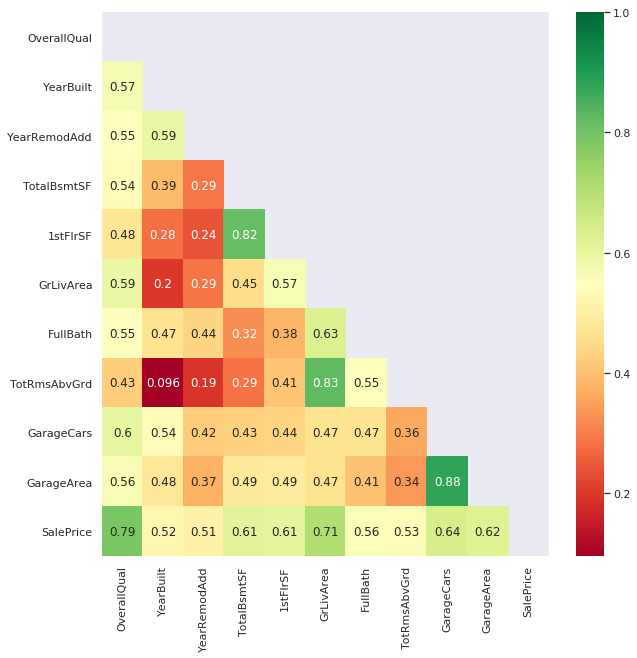

In [11]:
df2_corr = df2.corr()
corrf_list = df2_corr['SalePrice']
corrf_list = corrf_list.where(abs(corrf_list) > 0.5)
corrf_list = corrf_list.dropna()
corr_fig, corr_ax = plt.subplots(figsize=(10,10))
corrf_matrix = pd.DataFrame(data=df2_corr, index = corrf_list.index, columns = corrf_list.index)
corrf_mask = np.zeros_like(corrf_matrix, dtype=np.bool)
corrf_mask[np.triu_indices_from(corrf_mask)] = True
sns.heatmap(corrf_matrix, annot=True, ax=corr_ax, mask=corrf_mask, cmap=plt.get_cmap('RdYlGn'))
corrf_list

## 1.3 Пропущеные данные (3 балла)

Задание:
 - Посчитайте общее количество пропущенных данных по каждому признаку
 - посчитайте долю пропущенных данных выборки
 - удалите из выборки признаки, доля пропущенных которых больще 10%
 - пропущенные категориальные заполните словом 'unknown' (у них dtype object)
 - пропущенные числовые заполните средним (у них dtype float)

Hinst: https://stackoverflow.com/a/38134049/3205200

In [12]:
missing_total = pd.isnull(df).sum().sum()
print(missing_total)
print(missing_total / df.size)
df3 = df

proc = pd.isnull(df3).sum() / df3.shape[0]
df3 = pd.DataFrame(data=df3, columns = proc.where(proc < 0.1).dropna().index)

#print(proc.where(proc < 0.1).dropna().index)
#df3 = df3
#pd.isnull(df3.columns.values)

#for col in df3.columns:
#    print(pd.isnull(df).sum())

6965
0.05963184931506849


In [13]:
df3[df3.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns] = df3[df3.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns].fillna(df3.mean())#, inplace=True)
#pd.isnull(df4).sum().sum()
df3[df3.select_dtypes(include='object').columns] =  df3[df3.select_dtypes(include='object').columns].fillna("Unknown")
#pd.isna(df3).sum()
#df3.select_dtypes(include='object').columns
#df3['BsmtQual']
#df3.select_dtypes(include='object').columns
#df3['Street']
#(df3.values == 'Unknown').sum()

#df3["BsmtQual"].fillna("Unknown", inplace = True) 
#pd.isna(df3).sum().sum()

## 1.4 Категориальные переменные (1 балл)

На сколько вы помните, линейная регрессия не умеет обрабатывать категориальные признаки, так как ей нужны ЧИСЛА. Но не беда, в pandas есть встроенная функция [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Задание:
- сконвертируйте все категориальные признаки(dtype=object) в вектора числовых с помощью get_dummies
- напечатайте сколько у вас теперь признаков
- Положите в переменную X все данные из датасета, кроме целевой переменной. Положите в переменную y только целевую переменную.

In [14]:
df4 = pd.get_dummies(data=df3, columns=df3.select_dtypes(include='object').columns, sparse=True)

In [15]:
print(df4.shape[1])

281


In [16]:
x = df4.drop(columns='SalePrice')
y = df4['SalePrice']

## 1.5 Переобучение (3 балла)

Обучим обычную модель без регуляризации [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

- Выведите все коэффициенты для каждого признака, отсортировав по возрастанию по модулю значения коэффициента. Используйте print и for, иначе jupyter схлопнет вывод numpy массива. Можете округлить коэффициенты до 2 знаков после запятой.
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
reg = LinearRegression(fit_intercept=False, normalize=True).fit(x, y)
coeffs = pd.DataFrame(data=reg.coef_, index=x.columns)
coeffs.columns = ['coeff']
coeffs = coeffs.sort_values(by = 'coeff')
for cur in coeffs.index:
    print(cur, "{0:0.2f}".format(coeffs.at[cur, 'coeff']))

RoofMatl_ClyTile -610188.58
Condition2_PosN -195498.41
GarageCond_Ex -90682.07
Condition2_RRAe -85165.78
Functional_Sev -45140.53
Electrical_Mix -43839.14
GarageQual_Po -41534.75
Exterior1st_ImStucc -38115.18
LandSlope_Sev -36737.76
GarageQual_Fa -27288.38
Foundation_Wood -26813.78
RoofStyle_Flat -25480.90
MSZoning_C (all) -25295.24
Street_Grvl -24209.78
BsmtCond_Gd -24019.05
BsmtCond_Fa -23680.50
Utilities_NoSeWa -23646.64
HouseStyle_2.5Fin -23496.84
Exterior2nd_Other -22504.65
Condition1_RRAe -22373.29
Heating_OthW -21998.95
GarageType_2Types -21685.90
GarageQual_TA -21295.83
BsmtCond_TA -20554.48
RoofStyle_Hip -19776.51
BsmtFinType2_Unknown -19634.87
RoofStyle_Gable -19625.06
Neighborhood_Mitchel -19564.46
GarageQual_Gd -19489.37
Neighborhood_Edwards -18227.12
Exterior2nd_Stone -17849.11
RoofStyle_Gambrel -16587.87
LandContour_Low -16308.53
LotConfig_FR3 -15797.96
Neighborhood_NWAmes -15451.65
BldgType_Twnhs -13613.52
Neighborhood_NAmes -13476.20
BsmtExposure_Unknown -13328.62
Exter

In [18]:
print("{0:0.2f}".format(cross_val_score(reg, x, y, scoring='neg_mean_squared_error', cv=5).mean()))

-104600788172826.48


К счастью в этот раз коэффициенты при признаках не улетели в космос, но всё равно достигли очень больших значений. Например `RoofStyle_Shed` получился в моем случае около `-514961`. А у некоторых признаков коэффициент уже равен 0, хотя не была применена регуляризация.

## 1.6 Ridge и Lasso (4 балла)

- Обучите Lasso и Ridge для разных значений регуляризации alpha
- нарисуйте график значений коэффициентов модели для каждого признака, как мы делали на практике. По оси X будет значение alpha, по Y - значение коэффициента. на графике будет "радуга" из линий разных цветов(линий столько, сколько признаков).
- Нарисуйте гистограмму, в которой по оси Y будет количество коэффициентов, равных 0 (<0.0001) для Loss регресиии, а по оси X - значение коэффициента альфа.

alpha взять от 1 до 500 с каким-нибудь шагом. Но не переборщите, а то долго будете ждать.

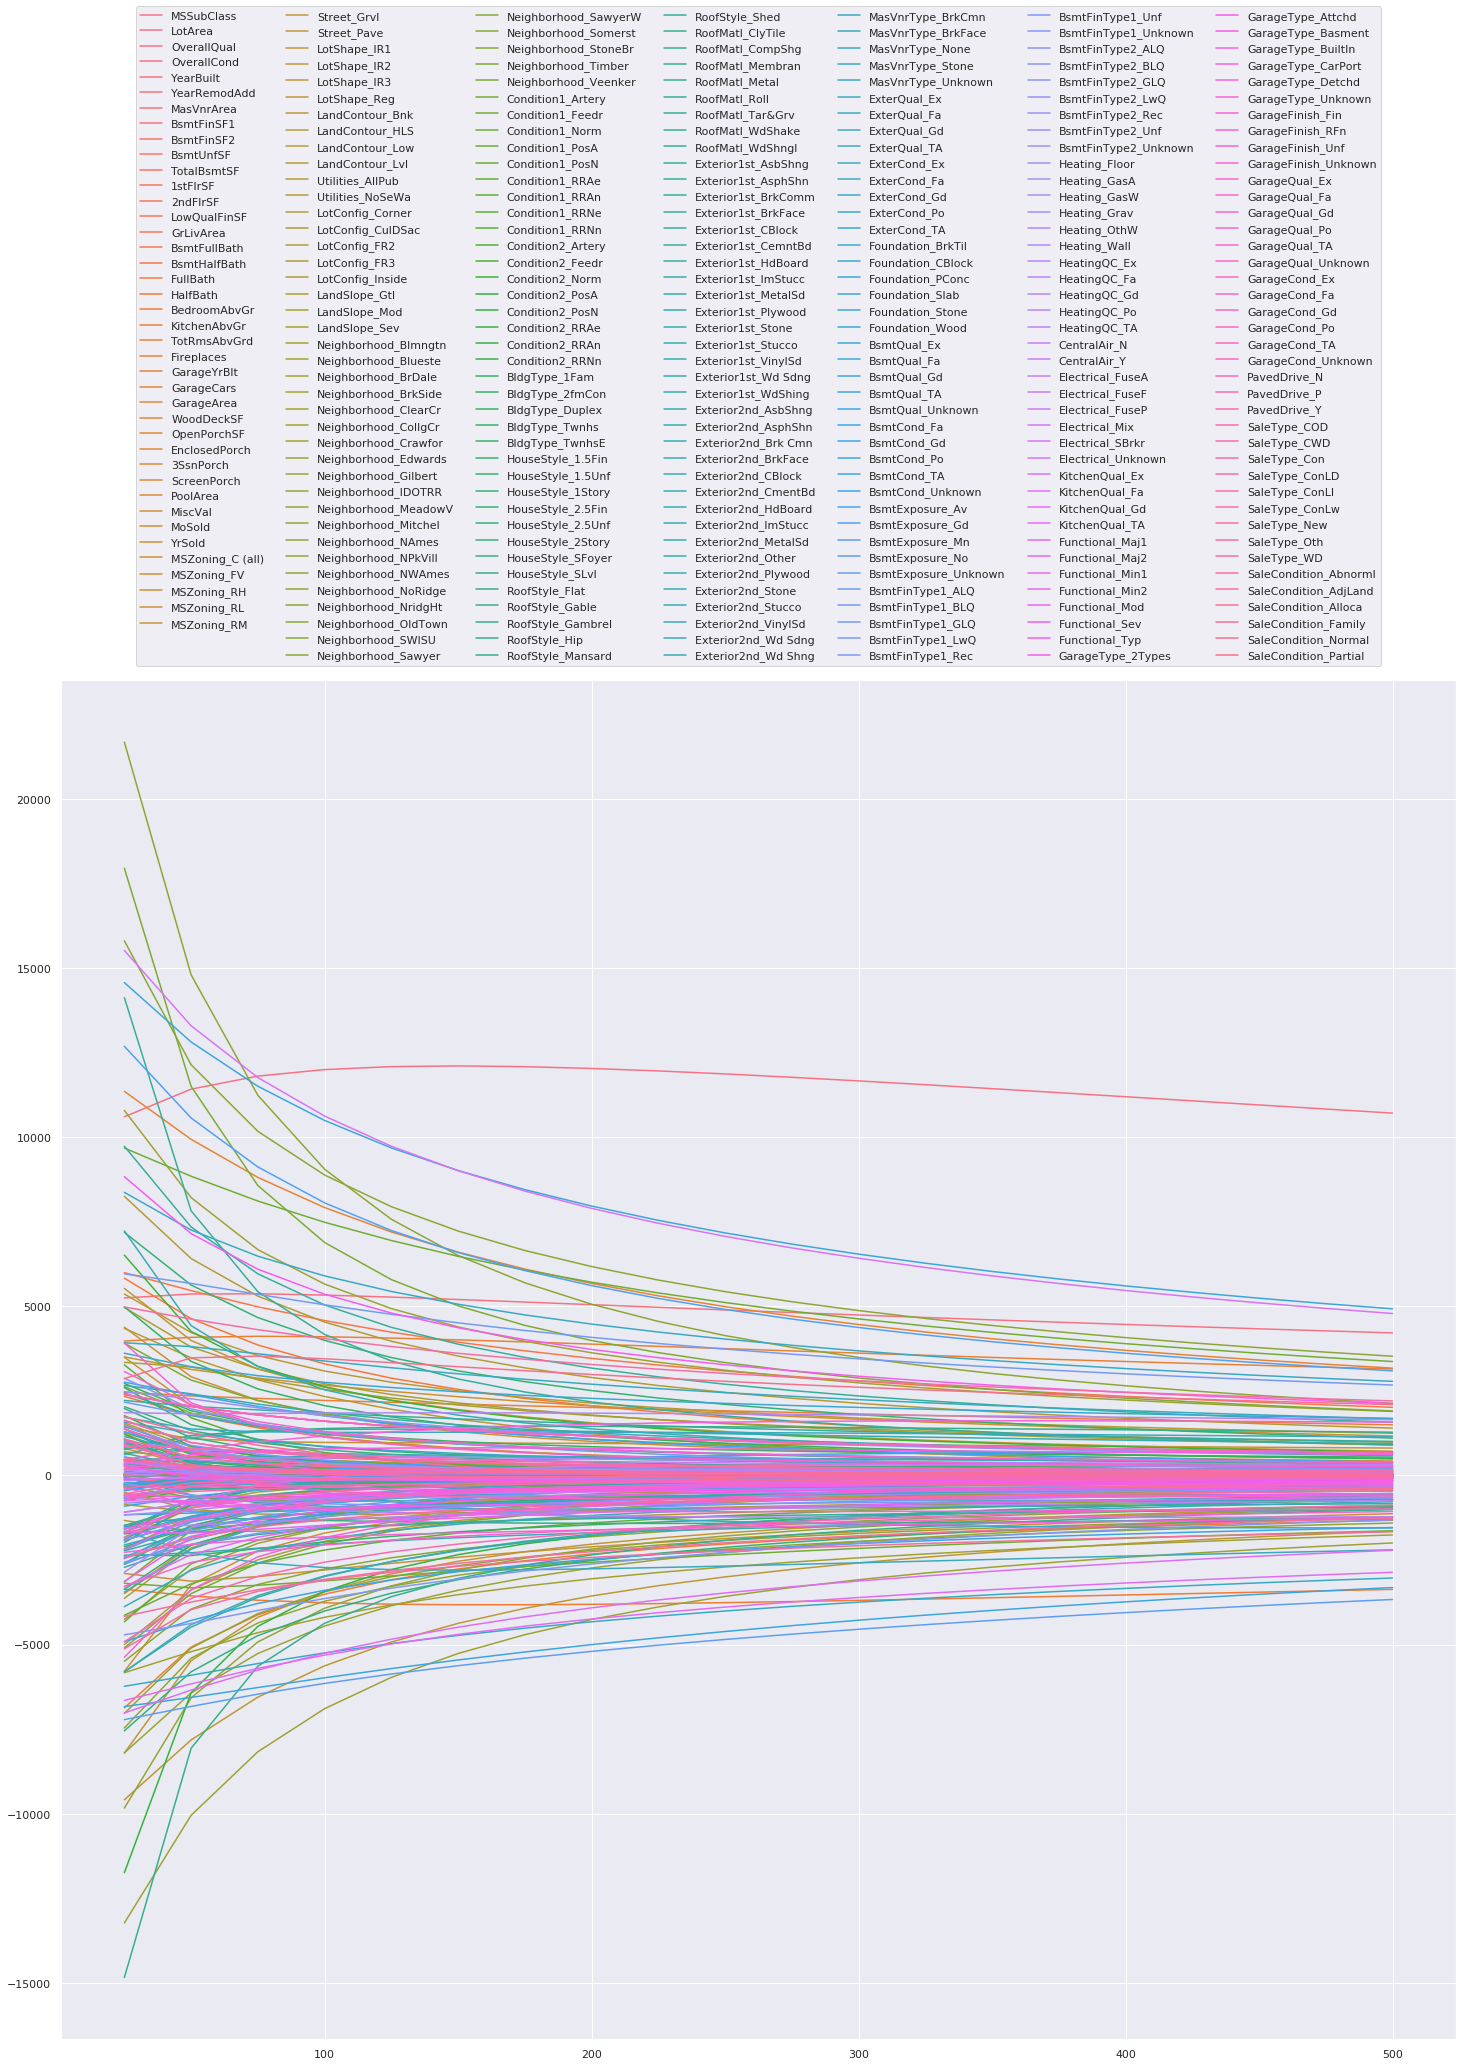

In [19]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

alpha_step = 25 #  25
cur_alpha = alpha_step

df_ridge = pd.DataFrame()

while(cur_alpha <= 500):
    clf_ridge = Ridge(alpha=cur_alpha)
    cur_ridge = clf_ridge.fit(x, y)
    s = pd.Series(cur_ridge.coef_)
    s.name = cur_alpha
    df_ridge = df_ridge.append(s)
    
    cur_alpha = cur_alpha + alpha_step

ax = plt.subplots(figsize=(25,25))
g = sns.lineplot(data=df_ridge, dashes=False)

g.legend(labels = x.columns.values, loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol = 7)

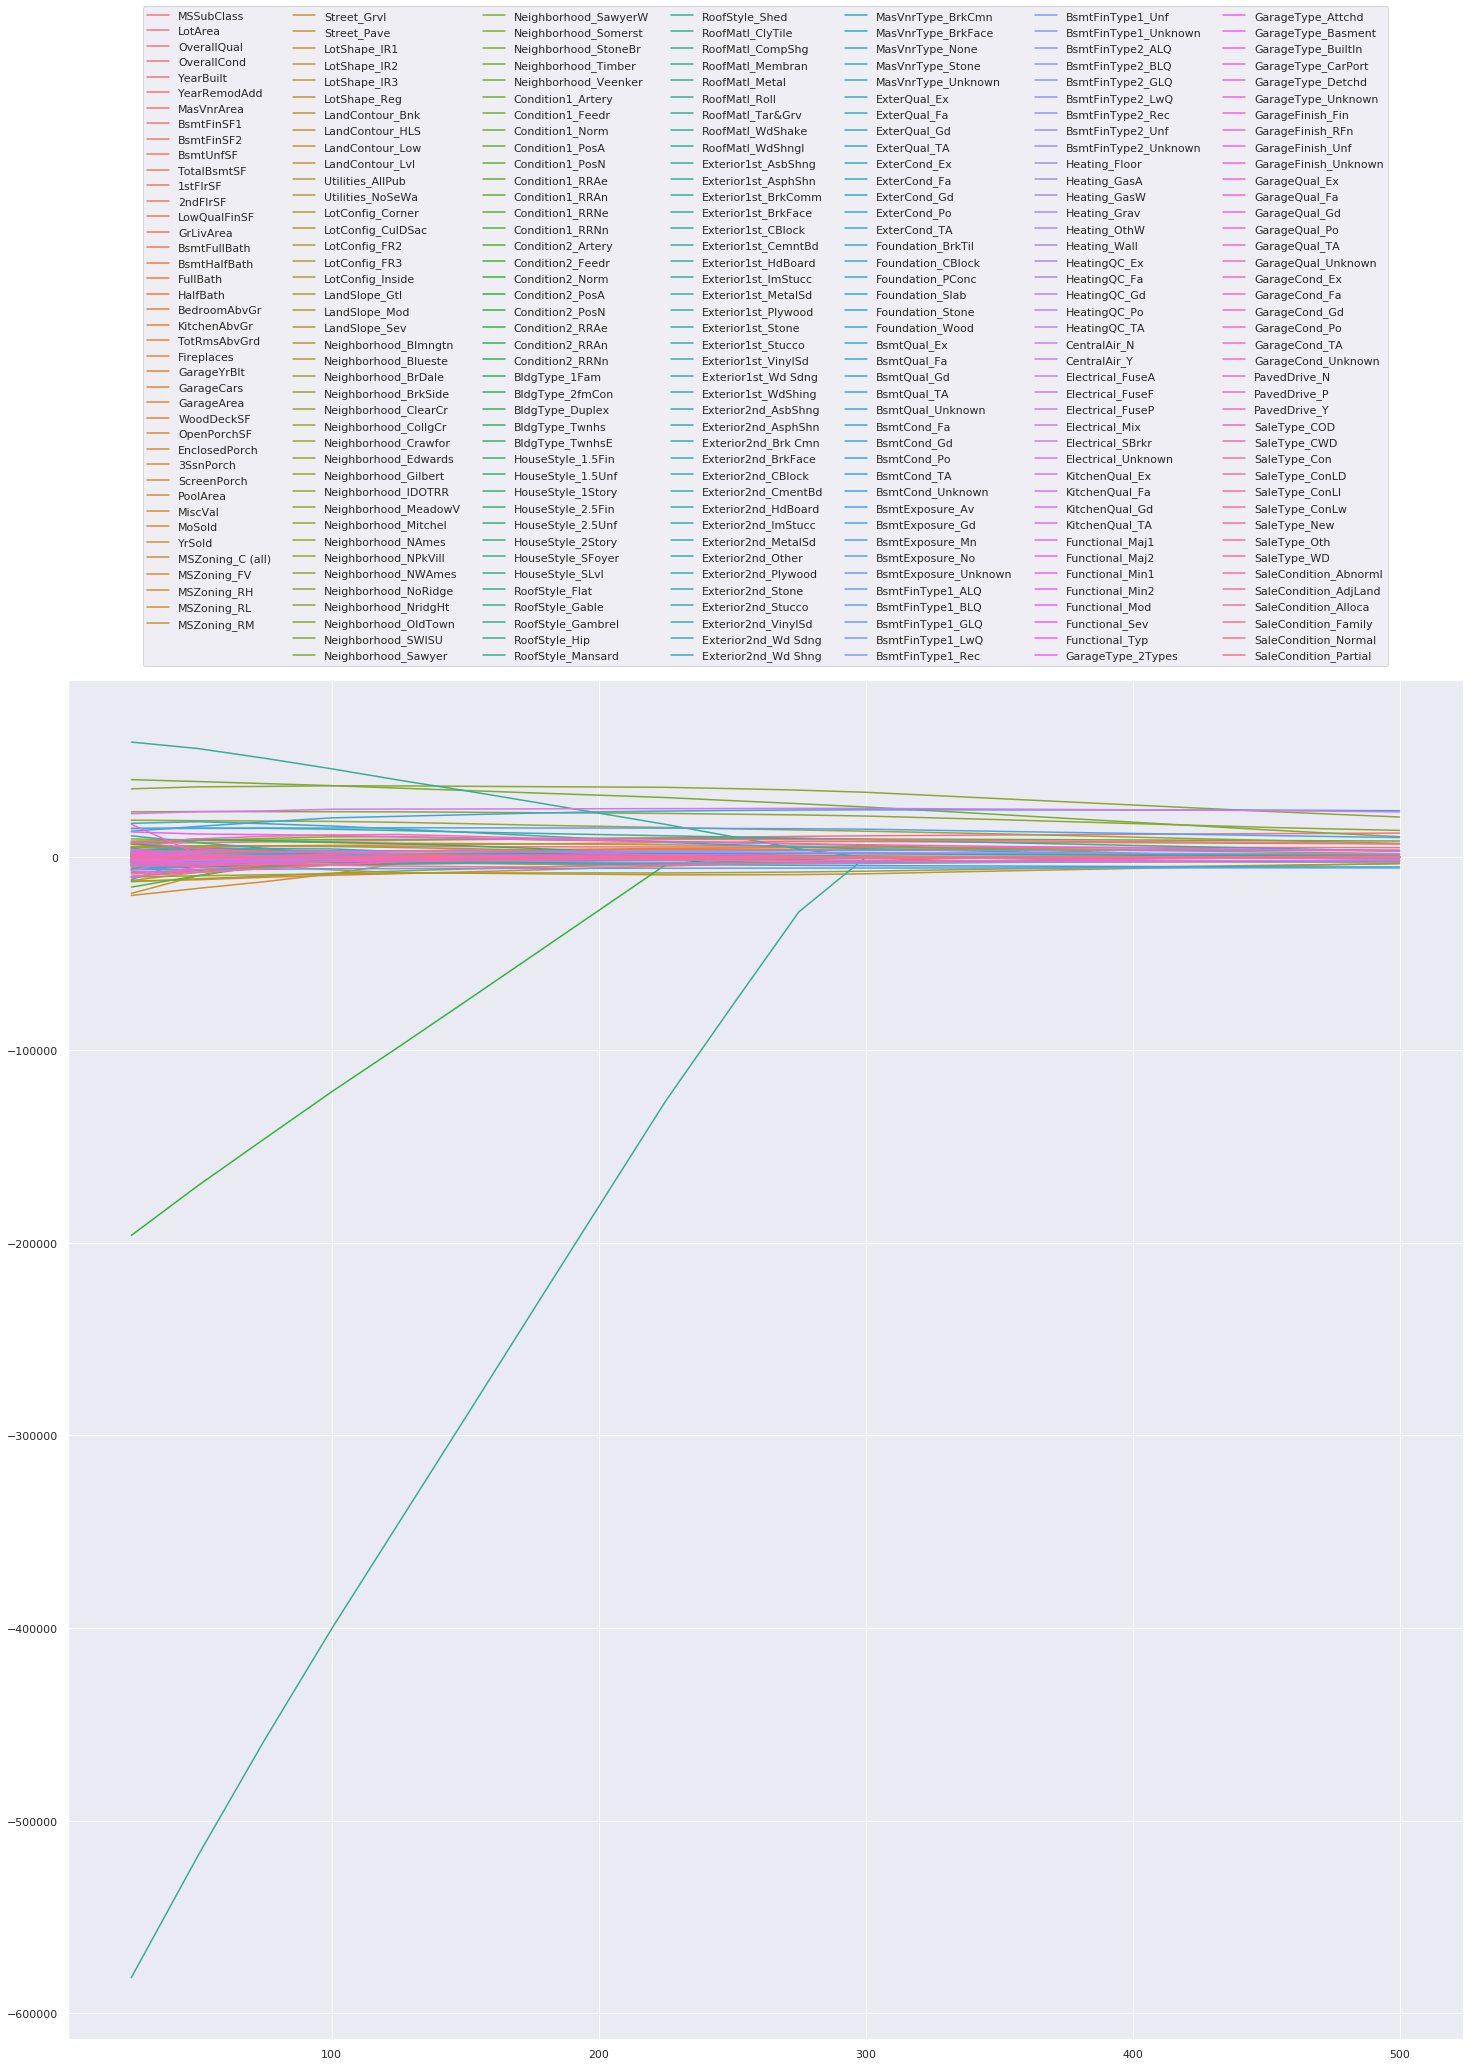

In [20]:
alpha_step_2 = 25 #  25
cur_alpha_2 = alpha_step_2

df_lasso = pd.DataFrame()

while(cur_alpha_2 <= 500):
    clf_lasso = Lasso(alpha=cur_alpha_2)
    cur_lasso = clf_lasso.fit(x, y)
    s_2 = pd.Series(cur_lasso.coef_)
    s_2.name = cur_alpha_2
    df_lasso = df_lasso.append(s_2)
    
    cur_alpha_2 = cur_alpha_2 + alpha_step_2

ax_2 = plt.subplots(figsize=(25,25))
g_2 = sns.lineplot(data=df_lasso, dashes=False)

g_2.legend(labels = x.columns.values, loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol = 7)

<StemContainer object of 3 artists>

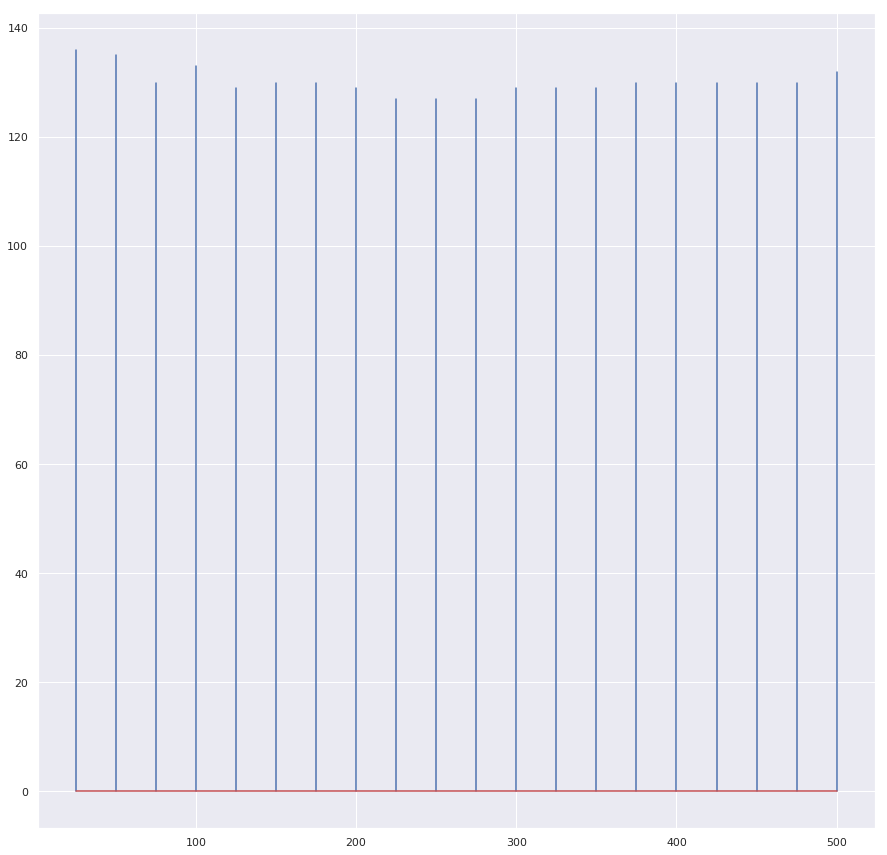

In [34]:
df_ridge_count = df_ridge.where(df_ridge < 0.0001).isna()#.sum(axis=1)
#df_ridge_count.plot(x=df_ridge_count.index, y = df_ridge_count.sum(axis=1))
#df_ridge_count.index = df_ridge

df_ridge_count['total_count'] = df_ridge_count.sum(axis=1)

fig_3, ax_3 = plt.subplots(figsize=(15,15))
ax_3.stem(df_ridge_count.index, df_ridge_count['total_count'], markerfmt=' ')

#df_ridge_count.plot(x=df_ridge_count.index, y=df_ridge_count['total_count'], style='o')

#df_ridge_count['total_count']
#df_ridge_count.plot(kind='hist')

#ax_3 = plt.subplots(figsize=(15,15))
#sns.countplot(x = df_ridge_count.index, hue=df_ridge_count['total_count'])

#df_ridge_count = df_ridge_count.transpose()

#df_ridge_count.replace(to_replace=True, value=1, inplace=True)
#df_ridge_count.replace(to_replace=0, value=2, inplace=True)

#df_ridge_count

#sns.countplot(x = df_ridge_count.columns)



#df_ridge_count.plot(x=df_ridge_count.index, y = df_ridge_count['total_count'])

#df_ridge_count

#df_ridge_count.hist(by=df_ridge_count.index)

#df_ridge_count.hist()

#sns.countplot(y = df_ridge.where(df_ridge < 0.0001).isna().sum())
#sns.distplot(df_ridge.where(df_ridge < 0.0001).isna().sum())

#sns.countplot(x=df_ridge_count.sum(axis=1), data=df_ridge_count)#,
#df_ridge_count.index


#            data = df_ridge.where(df_ridge < 0.0001).isna())

#df_ridge_count = pd.DataFrame(index = df_ridge.index)

<StemContainer object of 3 artists>

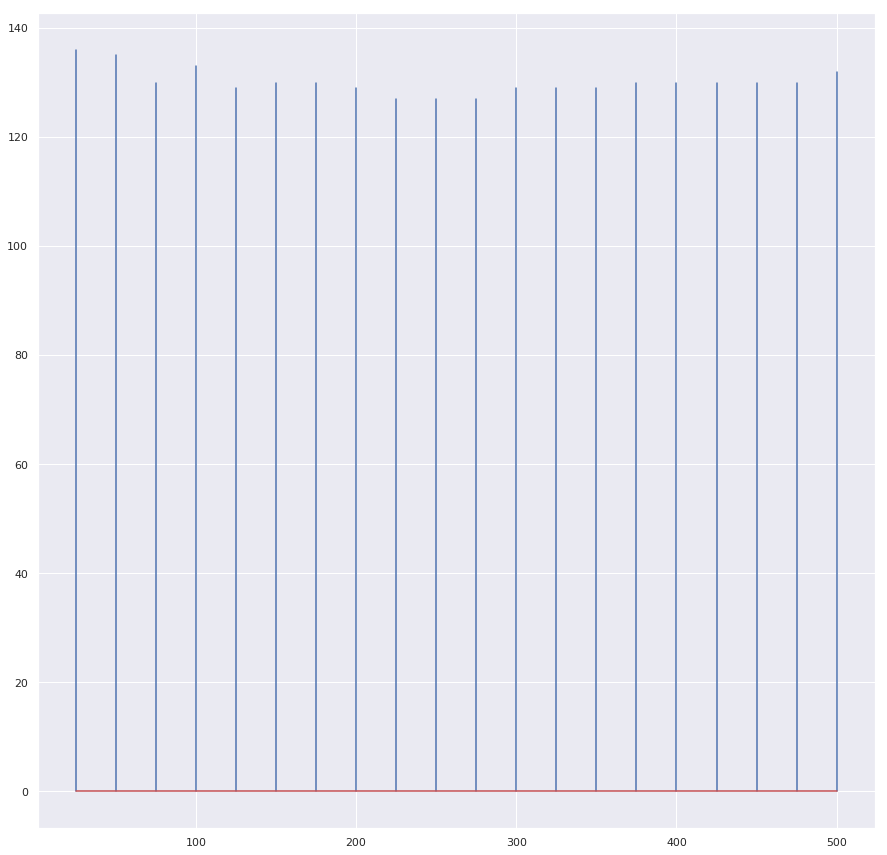

In [35]:
df_lasso_count = df_lasso.where(df_ridge < 0.0001).isna()#.sum(axis=1)
#df_ridge_count.plot(x=df_ridge_count.index, y = df_ridge_count.sum(axis=1))
#df_ridge_count.index = df_ridge

df_lasso_count['total_count'] = df_lasso_count.sum(axis=1)

fig_4, ax_4 = plt.subplots(figsize=(15,15))
ax_4.stem(df_ridge_count.index, df_ridge_count['total_count'], markerfmt=' ')


#alpha_step_2 = 25 #  25
#cur_alpha_2 = alpha_step_2

#df_lasso = pd.DataFrame()

#while(cur_alpha_2 <= 500):
#    clf_lasso = Lasso(alpha=cur_alpha_2)
#    cur_lasso = clf_lasso.fit(x, y)
#    s_2 = pd.Series(cur_lasso.coef_)
#    s_2.name = cur_alpha_2
#    df_lasso = df_lasso.append(s_2)
    
#    cur_alpha_2 = cur_alpha_2 + alpha_step_2

#ax_2 = plt.subplots(figsize=(25,25))
#g_2 = sns.lineplot(data=df_lasso, dashes=False)

#g_2.legend(labels = x.columns.values, loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol = 7)

## 1.7 Поиск оптимального alpha (6 баллов)

- С помощью метода LassoCV найдите оптимальное значение alpha и напечатайте его, используя разбиение на 5 фолда в кроссвалидации (`cv=5`).
- Нарисуйте график зависимости MSE от alpha (`mse_path_`).
- Нарисуйте длинную гистограмму магнитуда признаков, как в классе, на которой будет показано значение коэффициента для каждого признака. Графк должен быть остортирован по величине коэффициентов. Признаки с нулевыми коэффициентами должны быть удалены.
- Сколько в итоге ненулевых признаков осталось?
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error). Качество должно быть лучше, чем у простой линейной регрессии.

In [39]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv = 5, fit_intercept=False, normalize=True).fit(x, y)
reg.alpha_

2111784.888286988

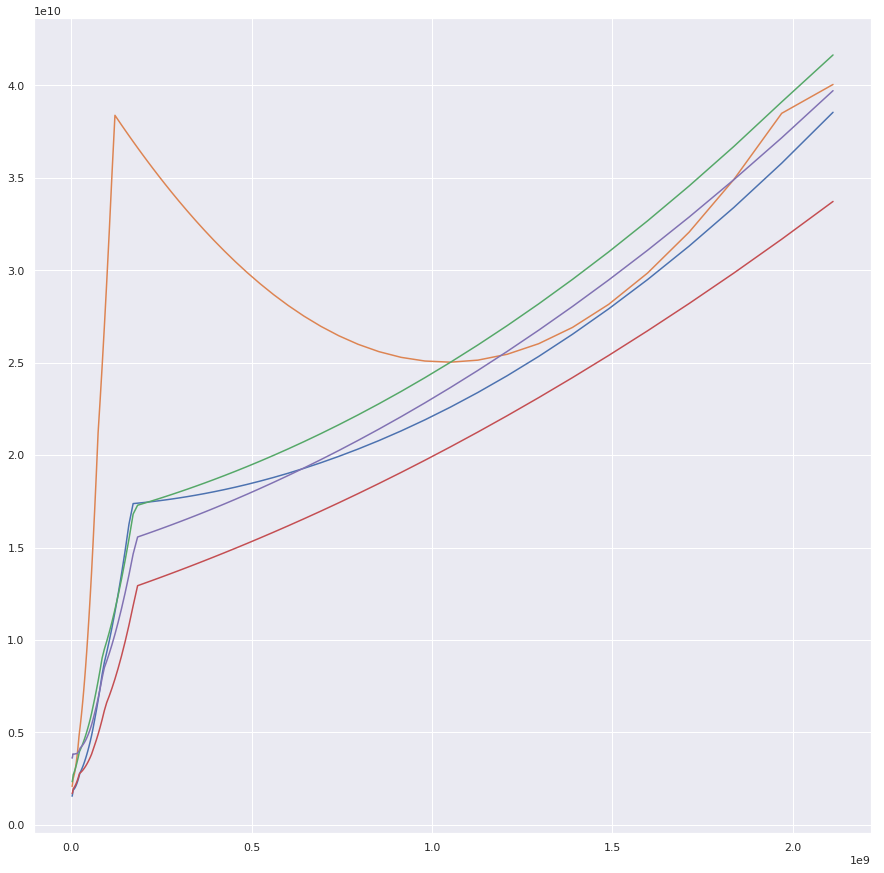

In [63]:
fig_5, ax_5 = plt.subplots(figsize=(15,15))

plt.plot(reg.alphas_,reg.mse_path_)

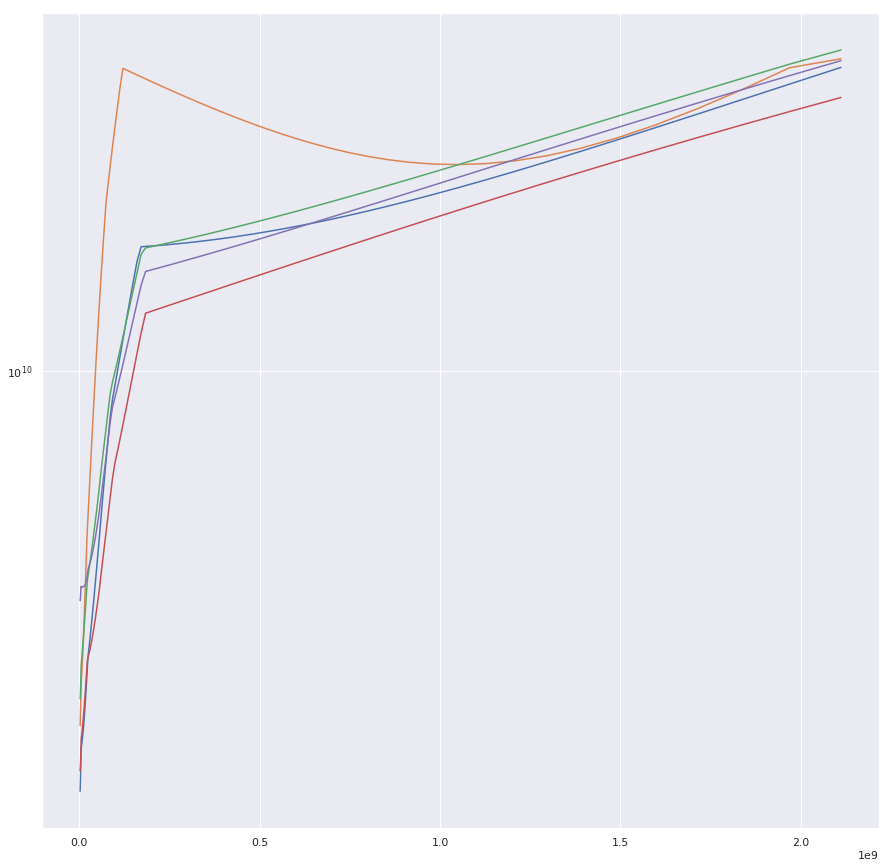

In [64]:
fig_6, ax_6 = plt.subplots(figsize=(15,15))
ax_6.set_yscale('log')
plt.plot(reg.alphas_,reg.mse_path_)

<StemContainer object of 3 artists>

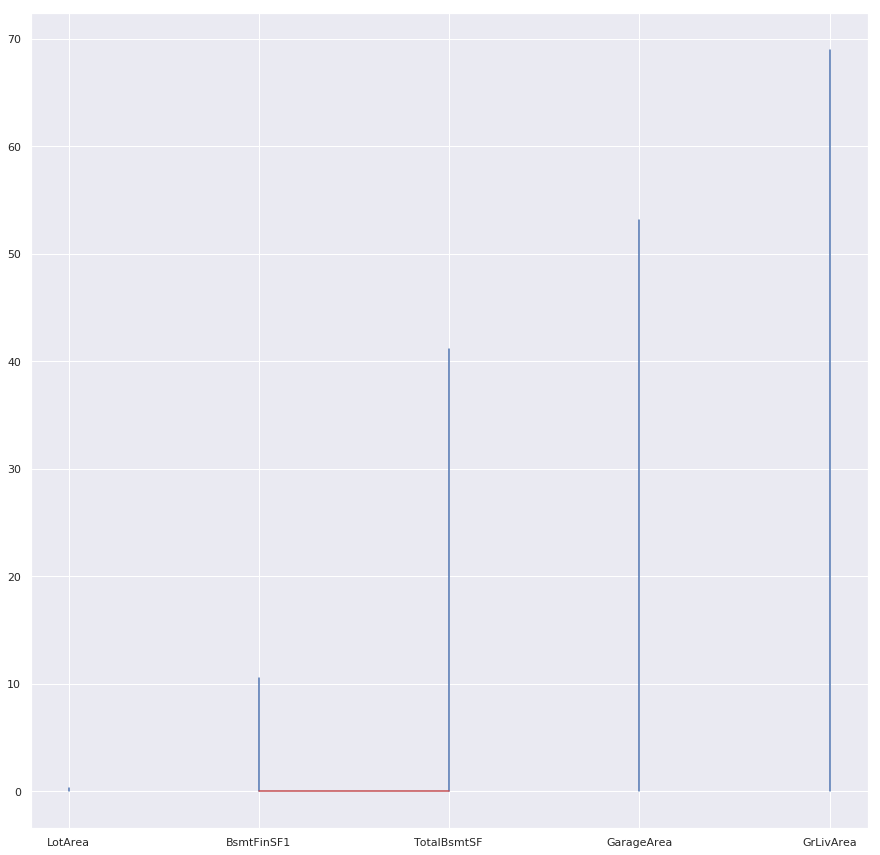

In [88]:
reg_coeffs = pd.DataFrame(index = x.columns)
reg_coeffs['coeff'] = reg.coef_
reg_coeffs = reg_coeffs.where(reg_coeffs['coeff'] > 0.0001).dropna().sort_values(by='coeff')

fig_7, ax_7 = plt.subplots(figsize=(15,15))
ax_7.stem(reg_coeffs.index, reg_coeffs['coeff'], markerfmt=' ')
#reg_coeffs

In [77]:
np.nonzero(reg.coef_)[0].size

5

In [78]:
from sklearn.model_selection import cross_val_score
cross_val_score(reg, x, y, scoring='neg_mean_squared_error', cv=5).mean()

-2250167300.8258624

## 1.8 Предсказание на отложенной выборке (3 балла)

- Используя [sklearn.model_selection.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) разбейте датасет на 2 части - тренировочную и тестовую в соотношении 0.33. Не забудьте перемешать!
- Напечатайте размерность X_train и X_test

In [111]:
from sklearn.model_selection import train_test_split
x_split = train_test_split(df4, train_size=0.25, shuffle=True)
print(x_split[0].shape)
print(x_split[1].shape)

(365, 281)
(1095, 281)


/home/evggenshch/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Теперь, возьмите вашу самую мощную модель(не тренированную!). Запустите её тренировку по тренировочной выборке X_train, y_train с помощью функции `fit`. Постройте предсказания с помощью функции `predict`.

In [112]:
x_train = x_split[0].drop(columns='SalePrice')
y_train = x_split[0]['SalePrice']
reg_2 = LassoCV(cv = 5, fit_intercept=False, normalize=True).fit(x_train, y_train)

Визуализируйте scatter plot предсказанных значений и настоящих (`y_test`). У вас должен получиться график, точки которого расположены приблизительно вдоль некоторой прямой с разбросом. Идеальный предсказатель будет выглядить как набор точек вдоль прямой без разброса.

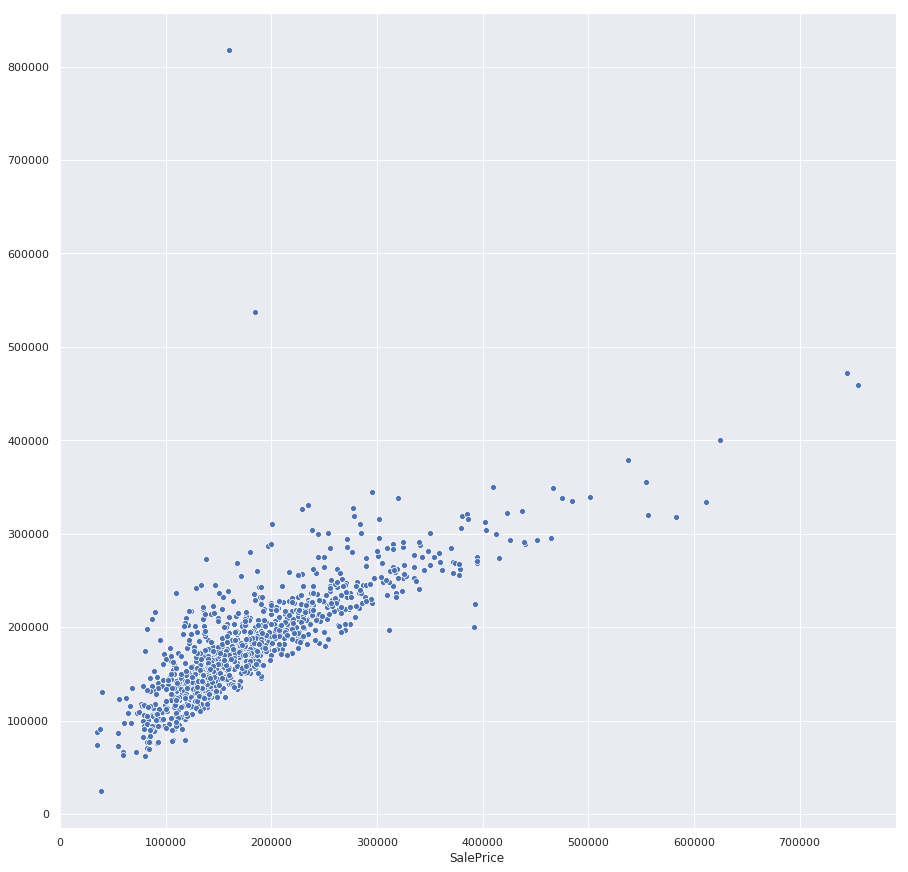

In [113]:
x_test = x_split[1].drop(columns='SalePrice')
y_test = x_split[1]['SalePrice']
y_model = reg_2.predict(x_test)
fig_8, ax_8 = plt.subplots(figsize=(15,15))
ax_8 = sns.scatterplot(x=y_test, y=y_model)

## 1.9 Ограниченная версия ( 4 балла)

Помните в самом начале мы оставили очень мало признаков по данным из heatmap. Настало время проверить как он себя покажет! К счастью они все сразу числовые, а не категориальные. Переиспользуйте тот дадасет, где вы уже поборолись с пропусками.
Снова выделите отдельно X и y и запустите кроссвалидацию c 5 фолдами по Lasso с `alpha=1`.

In [133]:
corrf_frame = pd.DataFrame(columns = corrf_list.index.values, data=df3)
corrf_x =  corrf_frame.drop(columns='SalePrice')
corrf_y = corrf_frame['SalePrice']
corrf_lasso = Lasso(fit_intercept=False, normalize=True, alpha = 1).fit(corrf_x, corrf_y)

/home/evggenshch/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [134]:
corrf_lasso.coef_

array([ 2.39506256e+04, -3.70906300e+01, -1.41966495e+01,  2.50230016e+01,
        1.03498280e+01,  4.45804824e+01,  2.54276700e+03, -1.17281643e+03,
        1.48903054e+04,  1.58414148e+01])

In [135]:
cross_val_score(corrf_lasso, corrf_x, corrf_y, scoring='neg_mean_squared_error', cv=5).mean()

/home/evggenshch/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/evggenshch/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/evggenshch/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/evggenshch/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did no

-1610977957.325828

/home/evggenshch/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


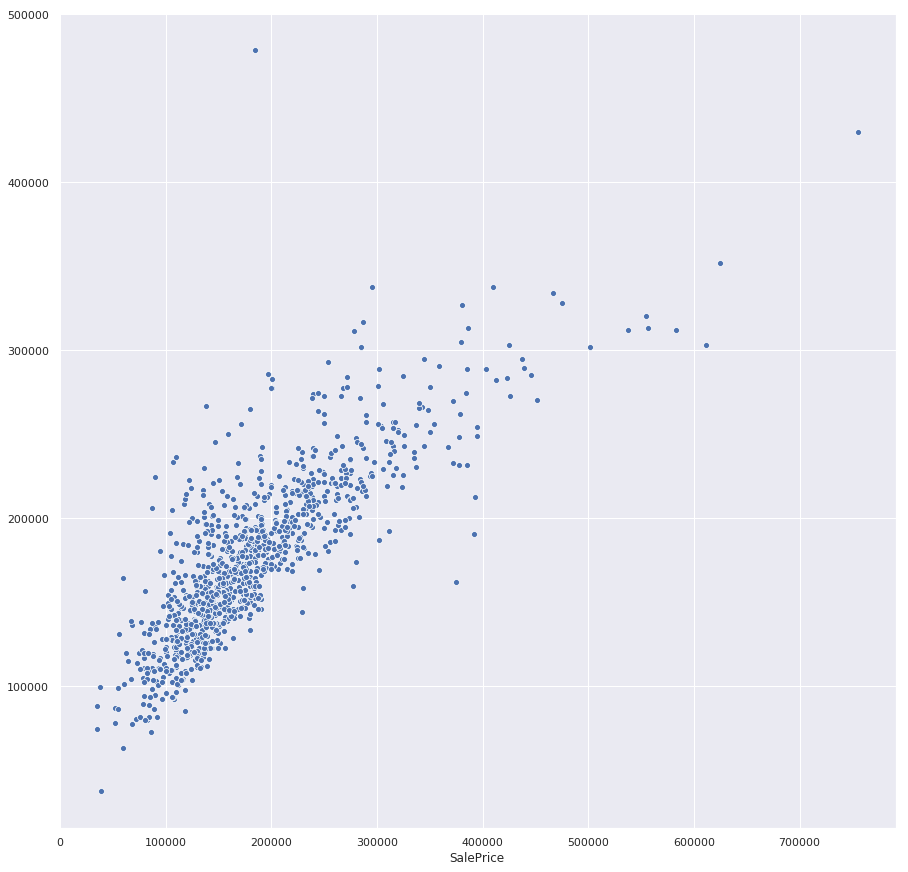

In [146]:
corrf_split = train_test_split(df3.select_dtypes(exclude='object'), train_size=0.25, shuffle=True)

corrfx_train = corrf_split[0].drop(columns='SalePrice')
corrfy_train = corrf_split[0]['SalePrice']
corrfx_train

reg_3 = LassoCV(cv = 5, fit_intercept=False, normalize=True).fit(corrfx_train, corrfy_train)

corrfx_test = corrf_split[1].drop(columns='SalePrice')
corrfy_test = corrf_split[1]['SalePrice']
corrfy_model = reg_3.predict(corrfx_test)
fig_10, ax_10 = plt.subplots(figsize=(15,15))
ax_10 = sns.scatterplot(x=corrfy_test, y=corrfy_model)

__*Визуально не сильно хуже предыдущего*__

Можете посмотреть еще много разных примеров обработки этого датасета тут: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

А суть всего этого такова, что в итоге надо кучу времени потратить на подготовку признаков. Смотреть на кучу графиков а потом стакать модели.